In [39]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from old_helper import OldHelper

In [40]:
xwd = 0.
ywd = 0.
zwd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
s = 7
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10}
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

In [41]:
def n_get_green_matrix(well, s):
    N = well.params["nseg"] # number of elements in half-length
    m = np.zeros((2+2*N, 2+2*N))
    dx = 1./N
    yd = well.ywd
    zd = well.zwd
    for i in range(-N, N):
        if i !=0:
            xd = well.xwd + i*dx
            m[i+N, 1] = 0.5* well.source.Green(s, xd, yd, zd, well.xwd, well.ywd, well.zwd,
                                               well.xwd - N*dx, well.xwd - N*dx+dx)
            m[i+N, -1] = 0.5* well.source.Green(s, xd, yd, zd, well.xwd, well.ywd, well.zwd,
                                                well.xwd + (N-1)*dx, well.xwd + N*dx)
            for j in range(-N+1, N):
                m[i+N, j+N+1] = 0.5*well.source.Green(s, xd, yd, zd, well.xwd, well.ywd, well.zwd,
                                                 dx*(j-1), dx*(j+1))
        else:
            m[i+N, :] = -m[i+N+1,:] + m[i+N-1,:] # элемент правой части посередине будет равен -pi*2*dx/Fcd
    return m

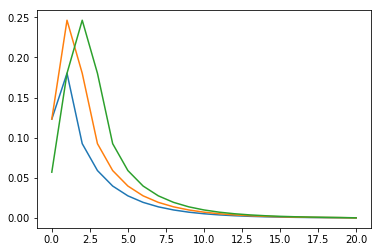

In [42]:
gm = n_get_green_matrix(well, s)
plt.plot(gm[0][1:])
plt.plot(gm[1][1:])
plt.plot(gm[2][1:])

In [15]:
def n_get_source_matrix(well, s):
    N = well.params["nseg"] # number of elements in half-length
    Fcd = well.params["Fcd"]
    m = np.zeros((2+2*N, 2+2*N))
    dx = 1./N
    coef = 0.25*(dx**2)*np.pi/Fcd
    m_ = np.zeros((N,N+1))
    for i in range(1, N+1):
        m_[i-1,0] = i
        for j in range(1, i+1):
            m_[i-1, j] = 2*(i-j) + 1
    m[:N, 1:N+2] = np.flip(np.flip(m_, 0), 1)
    m[N+1:1+2*N,N+1:] = m_
    m *= coef
    return m

In [16]:
def n_get_dummy_matrix(well, s):
    N = well.params["nseg"] # number of elements in half-length
    m = np.zeros((2+2*N, 2+2*N))
    m[:-1,0] = 1.
    m[N, 0] = 0.
    m[-1, 1] = 0.5
    m[-1, -1] = 0.5
    m[-1, 2:-1] = 1.
    return m

In [17]:
def n_get_right(well, s):
    N = well.params["nseg"]
    dx = 1./N
    Fcd = well.params["Fcd"]
    coef = np.pi * dx/Fcd/s
    b = np.zeros((2+2*N))
    b[-1] = 1/s/dx
    b[N] = np.pi*2*dx/Fcd/s
    for i in range(N):
        b[N+i+1] = coef*(i+1)
        b[N-i-1] = coef*(i+1)
    return b

In [18]:
n_dummy_matrix = n_get_dummy_matrix(well,s)
n_green_matrix = n_get_green_matrix(well, s)
n_source_matrix = n_get_source_matrix(well, s)
n_right_part = n_get_right(well,s)
n_solution = np.linalg.solve(n_dummy_matrix - n_green_matrix + n_source_matrix, n_right_part)

In [19]:
n_solution

array([  3.12500000e-02,   1.57878258e+15,  -1.57878258e+15,
         1.57878258e+15,  -1.57878258e+15,   1.57878258e+15,
        -1.57878258e+15,   1.57878258e+15,  -1.57878258e+15,
         1.57878258e+15,  -1.57878258e+15,   1.57878258e+15,
        -1.57878258e+15,   1.57878258e+15,  -1.57878258e+15,
         1.57878258e+15,  -1.57878258e+15,   1.57878258e+15,
        -1.57878258e+15,   1.57878258e+15,  -1.57878258e+15,
         1.57878258e+15])

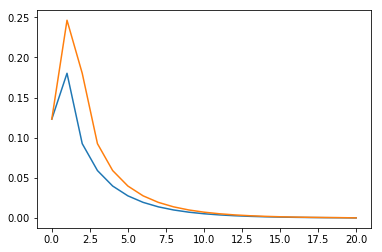

In [215]:
plt.plot(n_green_matrix[0][1:])
plt.plot(n_green_matrix[1][1:])

In [207]:
n_solution

array([  4.49218750e-02,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,  -3.55561877e+14,   3.55561877e+14,
        -3.55561877e+14,   3.55561877e+14,  -3.55561877e+14,
         3.55561877e+14,

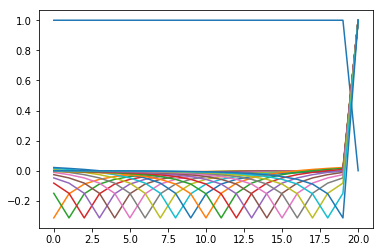

In [187]:
plt.plot(dummy_matrix - green_matrix + source_matrix)

In [188]:
helper = Helper()

In [189]:
dummy_matrix = helper.get_dummy_matrix(well)
green_matrix = helper.get_green_matrix(well, s)
source_matrix = helper.get_source_matrix(well, s)
right_part = helper.get_right_part(well,s)
solution = np.linalg.solve(dummy_matrix - green_matrix + source_matrix, right_part)

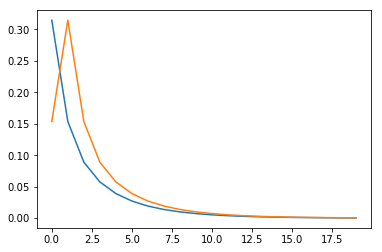

In [216]:
plt.plot(green_matrix[0][1:])
plt.plot(green_matrix[1][1:])

In [154]:
solution

array([ 0.09261609,  0.1046458 ,  0.0610211 ,  0.05937471,  0.05960156,
        0.06131367,  0.06381928,  0.0669878 ,  0.07098079,  0.07616059,
        0.09038041,  0.09038041,  0.07616059,  0.07098079,  0.0669878 ,
        0.06381928,  0.06131367,  0.05960156,  0.05937471,  0.0610211 ,
        0.1046458 ])

In [191]:
from old_helper import OldHelper
old_helper = OldHelper()

In [195]:
o_dummy_matrix = old_helper.get_dummy_matrix(well)
o_green_matrix = old_helper.get_green_matrix(well, s)
o_source_matrix = old_helper.get_source_matrix(well, s)
o_right_part = old_helper.get_right_part(well,s)
o_solution = np.linalg.solve(o_dummy_matrix - o_green_matrix + o_source_matrix, o_right_part)

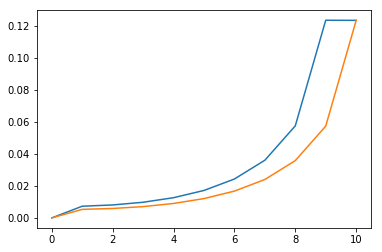

In [198]:
plt.plot(o_green_matrix[-3])
plt.plot(o_green_matrix[-2])

In [199]:
o_solution

array([ 0.08736038, -0.06047226,  0.49580085, -0.18844278,  0.44966659,
       -0.19326955,  0.42808639, -0.18737812,  0.41638321, -0.16840387,
        0.43660098])

In [225]:
from scipy.special import kn, k0, k1, iti0k0

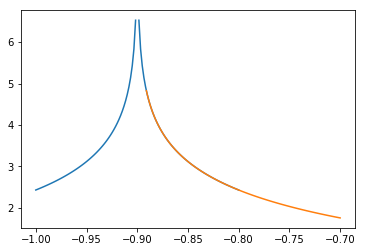

In [241]:
xs = np.linspace(-1,1,21)
xd = xs[1]
a1 = xs[0]
b1 = xs[2]
a2 = xs[1]
b2 = xs[3]
dots1 = np.linspace(a1, b1, 123)
dots2 = np.linspace(a2*0.99, b2, 123)
vals1 = []
vals2 = []
for d1, d2 in zip(dots1, dots2):
    vals1.append(k0(((d1-xd)**2)**0.5))
    vals2.append(k0(((d2-xd)**2)**0.5))
plt.plot(dots1, vals1)
plt.plot(dots2, vals2)

In [238]:
vals1

[2.4270690247020164,
 2.6252470933034528,
 2.87442133557317,
 3.2091473067380223,
 3.7186769146721819,
 4.81653205592412,
 4.81653205592412,
 3.7186769146721819,
 3.2091473067380223,
 2.87442133557317,
 2.6252470933034528,
 2.4270690247020164]

In [239]:
vals2

[3.2191594756732047,
 2.948053934822179,
 2.7357367538354689,
 2.5614209803924792,
 2.4137249977962729,
 2.2857334731289543,
 2.1729274395216254,
 2.0721900759134666,
 1.9812800630222798,
 1.8985311652011512,
 1.8226705872303341,
 1.7527038555281451]

In [20]:
from source_helper import *

In [44]:
def n_make_green_row(well, s, xd):
    N = well.params["nseg"] # number of elements in half-length
    dx = 1./N
    row = np.zeros(2*N+1)
    x = np.linspace(well.xwd-1, well.xwd+1, 2*N+1)
    row[0] = 0.5*frac_inf_imp_imp(xd, well.ywd, well.xwd, well.ywd, s**0.5, 1., x[0], x[1])
    row[2*N] = 0.5*frac_inf_imp_imp(xd, well.ywd, well.xwd, well.ywd, s**0.5, 1., x[-2], x[-1])
    for j in range(-N+1, N):
        row[j+N] = 0.5*frac_inf_imp_imp(xd, well.ywd, well.xwd, well.ywd, s**0.5, 1., x[j+N-1], x[j+N+1])
    return row

In [101]:
def n_make_green_matrix(well, s):
    N = well.params["nseg"]
    dx = 1./N
    xs = np.linspace(well.xwd-1+0.5*dx, well.xwd+1-0.5*dx, 2*N)
    m = np.zeros((2*N+1, 2*N+1))
    for i in range(2*N):
        m[i,...] = n_make_green_row(well,s,xs[i])
    m[-1,...] = n_make_green_row(well, s, well.xwd+dx) - n_make_green_row(well, s, well.xwd-dx)
    return m

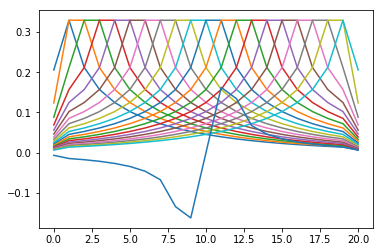

In [102]:
mg = n_make_green_matrix(well, 1)
for i in range(2*N+1):
    plt.plot(mg[i,:])

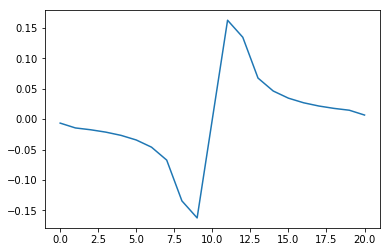

In [103]:
plt.plot(mg[-1,:])

In [108]:
def n_make_source_matrix(well, s):
    N = well.params["nseg"]
    Fcd = well.params["Fcd"]
    dx = 1./N
    m = np.zeros((2*N+1, 2*N+1), dtype = np.float)
    m_ = np.zeros((N, N+1), dtype=np.float)
    coef = np.pi/Fcd*0.0625*dx**2
    m_[0,0] = 1.5
    for i in range(N):
        m_[i, i+1] = 0.5
    for i in range(1, N):
        m_[i,i] = 8.5
        m_[i,0] = 9 + 8*(i-1)
        for j in range(1, i):
            m_[i,j] = 8 + 16*(i-j)
    m[:N,:N+1] = np.flip(np.flip(m_, 0), 1)
    m[N:2*N,N:] = m_
    m *= coef
    return m

In [112]:
def n_make_matrix(well,s):
    N = well.params["nseg"]
    green_m = n_make_green_matrix(well, s)
    source_m = n_make_source_matrix(well, s)
    m = np.zeros((2*(N+1), 2*(N+1)), dtype = np.float)
    m[:2*N,0] = 1
    m[-1, 1:] = 1
    m[:2*N+1, 1:] = source_m - green_m
    return m

In [119]:
main_m = n_make_matrix(well, s)
print(main_m[:,0])
print(np.sum(main_m[:,0]))
print(main_m[-1,:])
print(np.sum(main_m[-1,:]))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  0.]
20.0
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]
21.0


In [110]:
well.params["Fcd"] = np.pi
m = n_make_source_matrix(well, 1)
N = well.params["nseg"]
dx = 1/N
i = N+N
x = dx*(0.5+(i-N))
print(np.sum(m[i]), 0.5*(x)**2)

0.0 0.55125


In [49]:
N = well.params["nseg"]
dx = 1./N
x = np.linspace(well.xwd-1+0.5*dx, well.xwd+1-0.5*dx, 2*N)
x

array([-0.95, -0.85, -0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15,
       -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,
        0.85,  0.95])

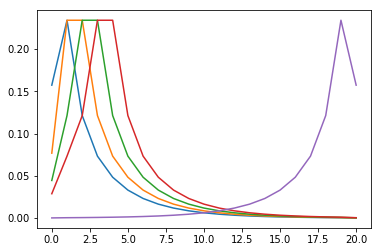

In [50]:
s = 7
plt.plot(n_make_green_row(well, s, x[0]))
plt.plot(n_make_green_row(well, s, x[1]))
plt.plot(n_make_green_row(well, s, x[2]))
plt.plot(n_make_green_row(well, s, x[3]))
plt.plot(n_make_green_row(well, s, x[-1]))

In [47]:
gm[0,1:] - n_make_green_row(well, s, x[0])

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -4.16333634e-17,
        -4.16333634e-17,   4.16333634e-17,   4.16333634e-17,
         0.00000000e+00,   0.00000000e+00,  -3.35668993e-16,
         0.00000000e+00,   1.09114107e-15,   0.00000000e+00,
        -7.55255233e-16,   0.00000000e+00,   0.00000000e+00,
        -4.19586241e-17,   0.00000000e+00,   4.19586241e-17])